In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import re
import matplotlib.pyplot as plt
from prettytable import PrettyTable

from utils import draw_trajectories, get_metric

In [4]:
def plot_nb_steps_per_seconds(names):
    fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
    for name in names:
        print(f'Drawing #steps/sec of {name}')
        seconds, mean_n_steps, std_n_steps = get_metric(
            name, metric='nb_step_by_sec')

        ax.plot(seconds, mean_n_steps, label=name, linewidth=1)
        ax.fill_between(seconds,
                        mean_n_steps - std_n_steps,
                        mean_n_steps + std_n_steps, alpha=.3)
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -.05))

In [5]:
def print_duration(names):
    table = PrettyTable()
    table.field_names = ['', 'Episode Duration (s)', 'Duration per step (s)']
    for name in names:
        if name == '':
            table.add_row(['', '', ''])
            continue
        print(f'Getting duration of {name}')
        n_envs = re.search(r'n-envs-(\d+)', name).group(1)
        _, mean_duration, std_duration = get_metric(name, metric='duration')
        duration_per_step = mean_duration / (int(n_envs) * 1000)
        table.add_row([name, f'{mean_duration.item():.2f} ± {std_duration.item():.2f}', f'{duration_per_step.item():.4f}'])
    print(table)

In [6]:
def print_derivatives(names):
    fig, axs = plt.subplots(1, 3, figsize=(3*4, 4), dpi=150)
    for name in names:
        print(f'Drawing derivatives of {name}')
        for i, metric in enumerate(['obs/dt_theta_boat/2', 'obs/dt_theta_rudder/0', 'obs/dt_theta_sail/0']):
            keys, mean_n_steps, std_n_steps = get_metric(name, metric=metric)
            axs[i].plot(keys, mean_n_steps, linewidth=1, label=name if i == 0 else None, alpha=.5)
            axs[i].fill_between(keys,
                            mean_n_steps - std_n_steps,
                            mean_n_steps + std_n_steps, alpha=.3)
            axs[i].set_xlabel('#steps')
            axs[i].set_ylabel(metric)

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -.05))

# Selection of the physic engine

## Trajectories

**Conclusion:** Similar path for every engines

Drawing trajectories of eval-pid-mss1-ode-n-envs-35-*
Drawing trajectories of eval-pid-mss1-bullet-n-envs-35-*
Drawing trajectories of eval-pid-mss1-simbody-n-envs-35-*
Drawing trajectories of eval-pid-mss1-dart-n-envs-35-*


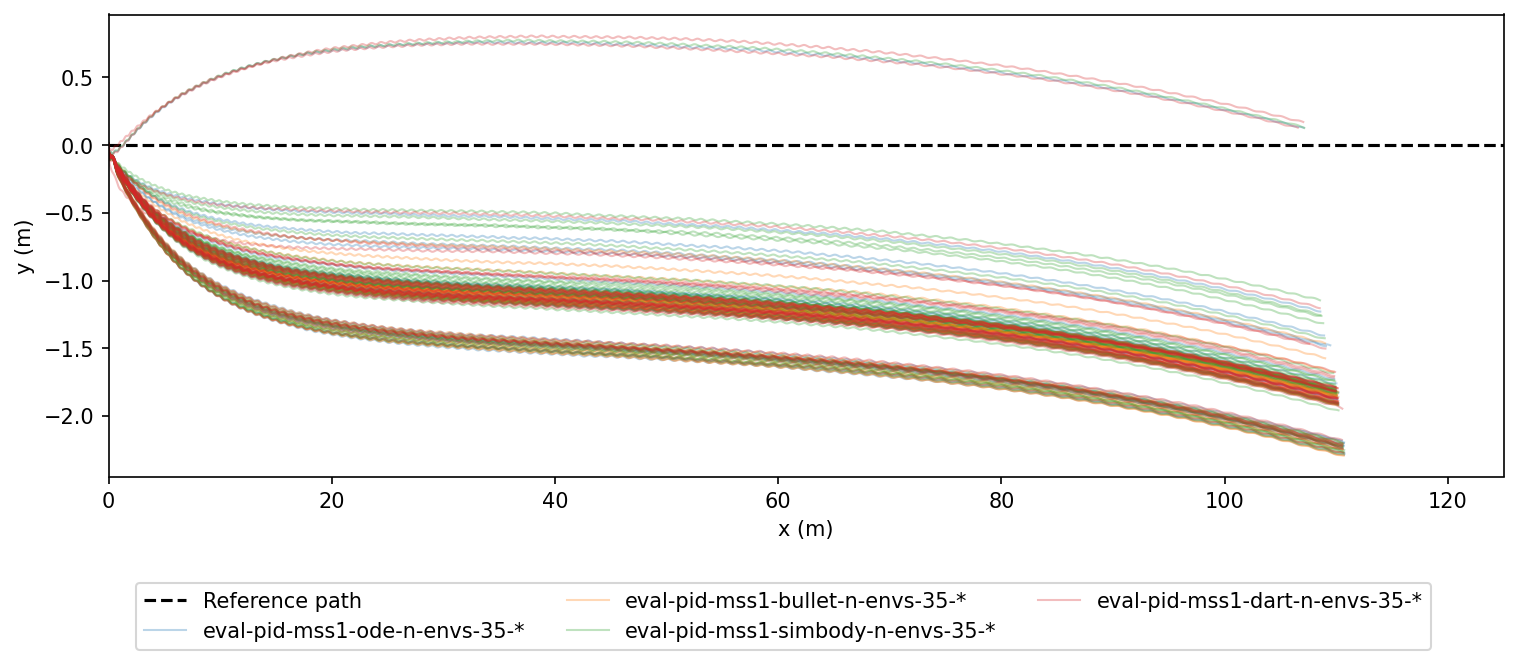

In [148]:
draw_trajectories([
    'eval-pid-mss1-ode-n-envs-35-*',
    'eval-pid-mss1-bullet-n-envs-35-*',
    'eval-pid-mss1-simbody-n-envs-35-*',
    'eval-pid-mss1-dart-n-envs-35-*',
])

## Time

**Conclusion:** ODE finished before. ODE seems less noisy (constant #steps/second). ODE is faster.

Drawing #steps/sec of eval-pid-mss1-ode-n-envs-35-*
Drawing #steps/sec of eval-pid-mss1-bullet-n-envs-35-*
Drawing #steps/sec of eval-pid-mss1-simbody-n-envs-35-*
Drawing #steps/sec of eval-pid-mss1-dart-n-envs-35-*


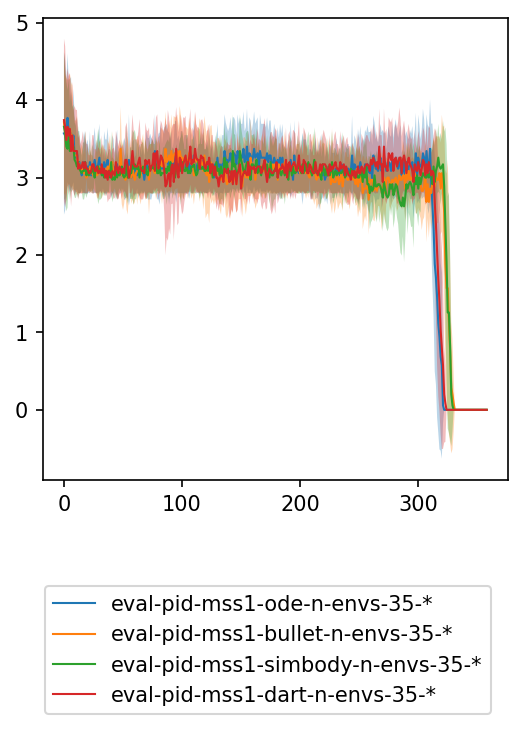

In [149]:
plot_nb_steps_per_seconds([
    'eval-pid-mss1-ode-n-envs-35-*',
    'eval-pid-mss1-bullet-n-envs-35-*',
    'eval-pid-mss1-simbody-n-envs-35-*',
    'eval-pid-mss1-dart-n-envs-35-*',
])

Drawing #steps/sec of eval-pid-mss1-ode-n-envs-35-*
Drawing #steps/sec of eval-pid-mss1-bullet-n-envs-35-*


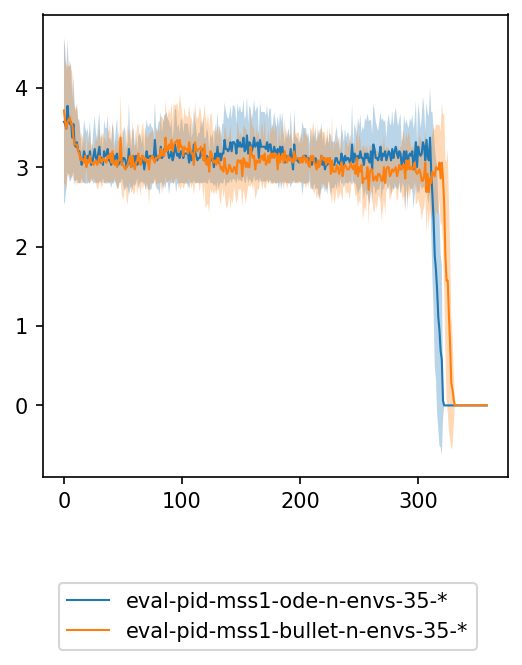

In [150]:
plot_nb_steps_per_seconds([
    'eval-pid-mss1-ode-n-envs-35-*',
    'eval-pid-mss1-bullet-n-envs-35-*',
    # 'eval-pid-mss1-simbody-n-envs-35-*',
    # 'eval-pid-mss1-dart-n-envs-35-*',
])

In [151]:
print_duration([
    'eval-pid-mss1-ode-n-envs-35-*',
    'eval-pid-mss1-bullet-n-envs-35-*',
    'eval-pid-mss1-simbody-n-envs-35-*',
    'eval-pid-mss1-dart-n-envs-35-*',
])

Getting duration of eval-pid-mss1-ode-n-envs-35-*
Getting duration of eval-pid-mss1-bullet-n-envs-35-*
Getting duration of eval-pid-mss1-simbody-n-envs-35-*
Getting duration of eval-pid-mss1-dart-n-envs-35-*
+-----------------------------------+---------------+
|                                   |  Duration (s) |
+-----------------------------------+---------------+
|   eval-pid-mss1-ode-n-envs-35-*   | 336.28 ± 3.02 |
|  eval-pid-mss1-bullet-n-envs-35-* | 344.19 ± 2.32 |
| eval-pid-mss1-simbody-n-envs-35-* | 345.02 ± 1.99 |
|   eval-pid-mss1-dart-n-envs-35-*  | 336.88 ± 1.97 |
+-----------------------------------+---------------+


## Derivatives

**Conclusion:** ODE is a bit less noisy.

Drawing derivatives of eval-pid-mss1-bullet-n-envs-35-*
Drawing derivatives of eval-pid-mss1-ode-n-envs-35-*
Drawing derivatives of eval-pid-mss1-simbody-n-envs-35-*
Drawing derivatives of eval-pid-mss1-dart-n-envs-35-*


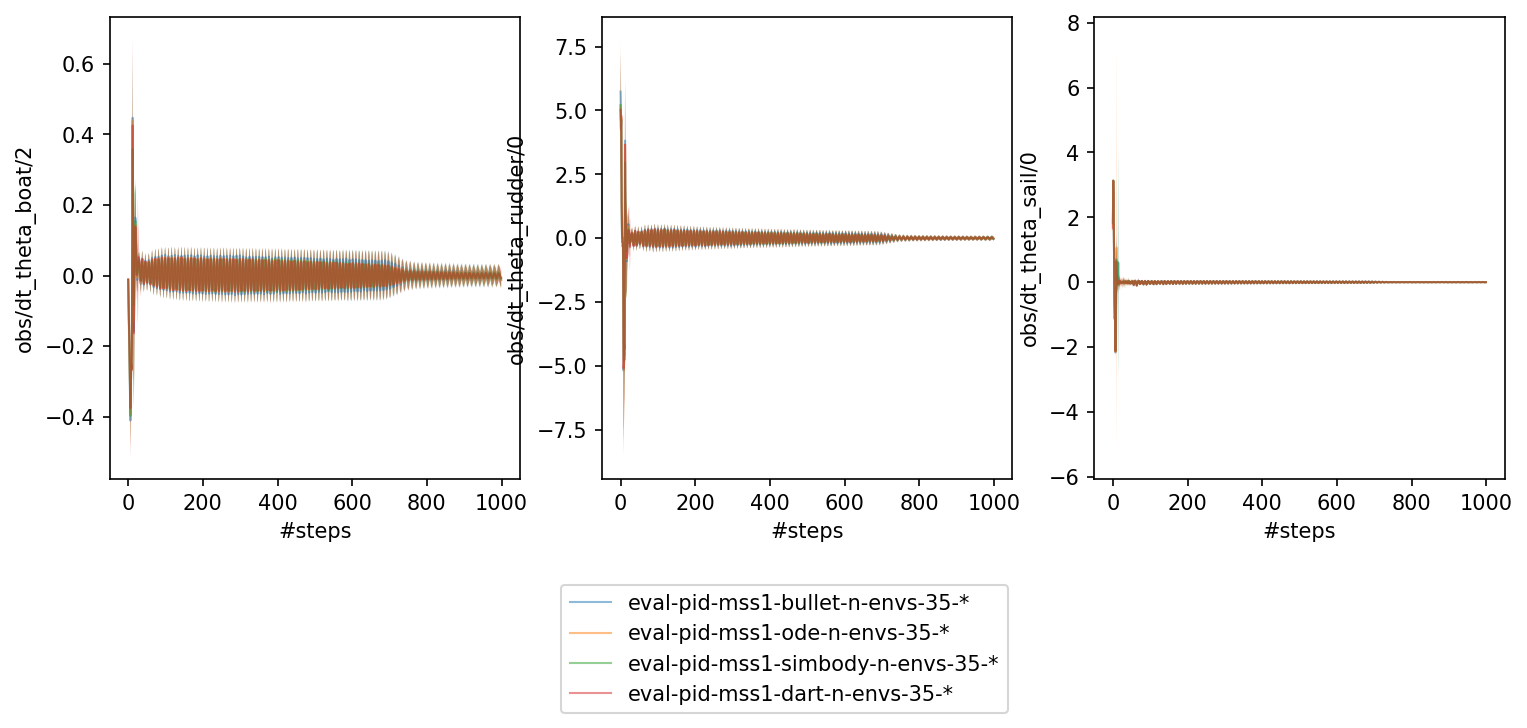

In [153]:
print_derivatives([
    'eval-pid-mss1-bullet-n-envs-35-*',
    'eval-pid-mss1-ode-n-envs-35-*',
    'eval-pid-mss1-simbody-n-envs-35-*',
    'eval-pid-mss1-dart-n-envs-35-*',
])

Drawing derivatives of eval-pid-mss1-bullet-n-envs-35-*
Drawing derivatives of eval-pid-mss1-ode-n-envs-35-*


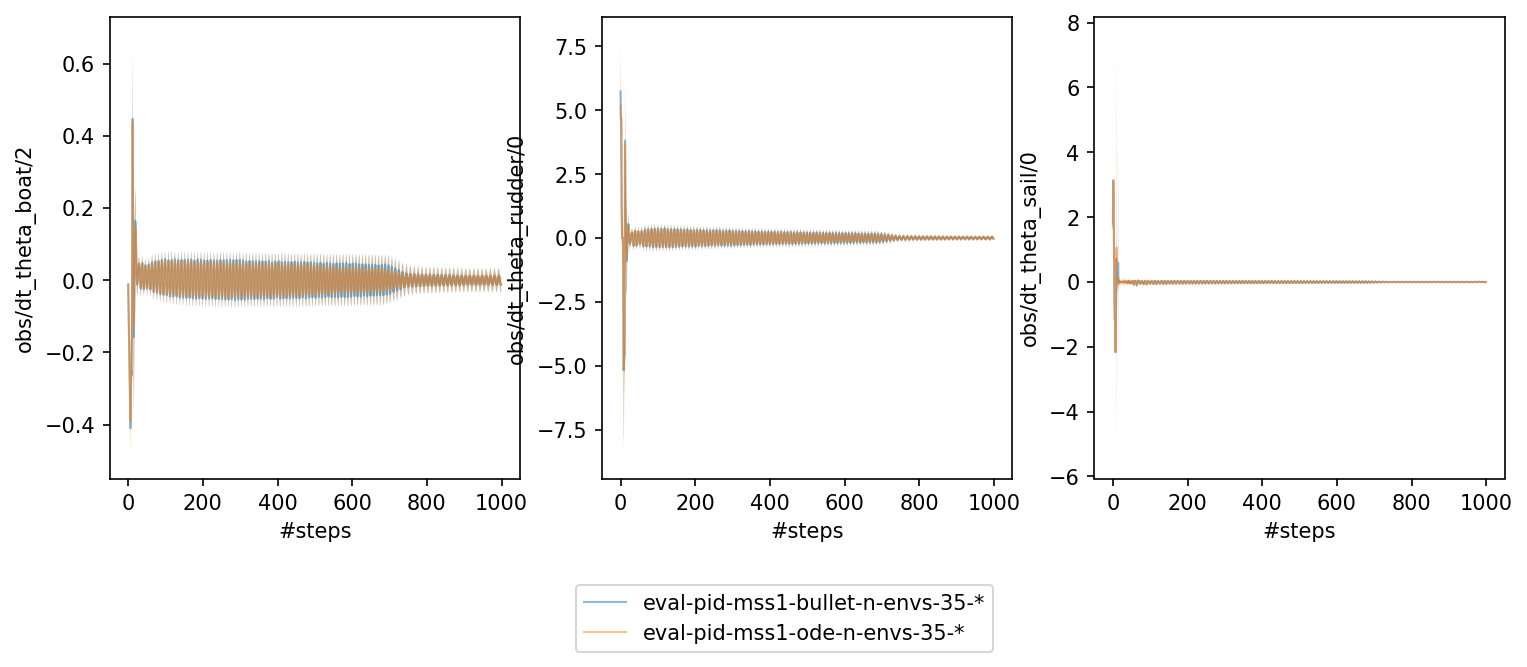

In [154]:
print_derivatives([
    'eval-pid-mss1-bullet-n-envs-35-*',
    'eval-pid-mss1-ode-n-envs-35-*',
    # 'eval-pid-mss1-simbody-n-envs-35-*',
    # 'eval-pid-mss1-dart-n-envs-35-*',
])

# Selected engine: ODE

In [8]:
selected_names = [
    'eval-pid-mss1-ourasi-ode-n-envs-7-*',
    'eval-pid-mss1-upnquick-ode-n-envs-21-*',
    'eval-pid-mss1-ode-n-envs-35-*',
]

## Trajectories

Drawing trajectories of eval-pid-mss1-ourasi-ode-n-envs-7-*
Drawing trajectories of eval-pid-mss1-upnquick-ode-n-envs-21-*
Drawing trajectories of eval-pid-mss1-ode-n-envs-35-*


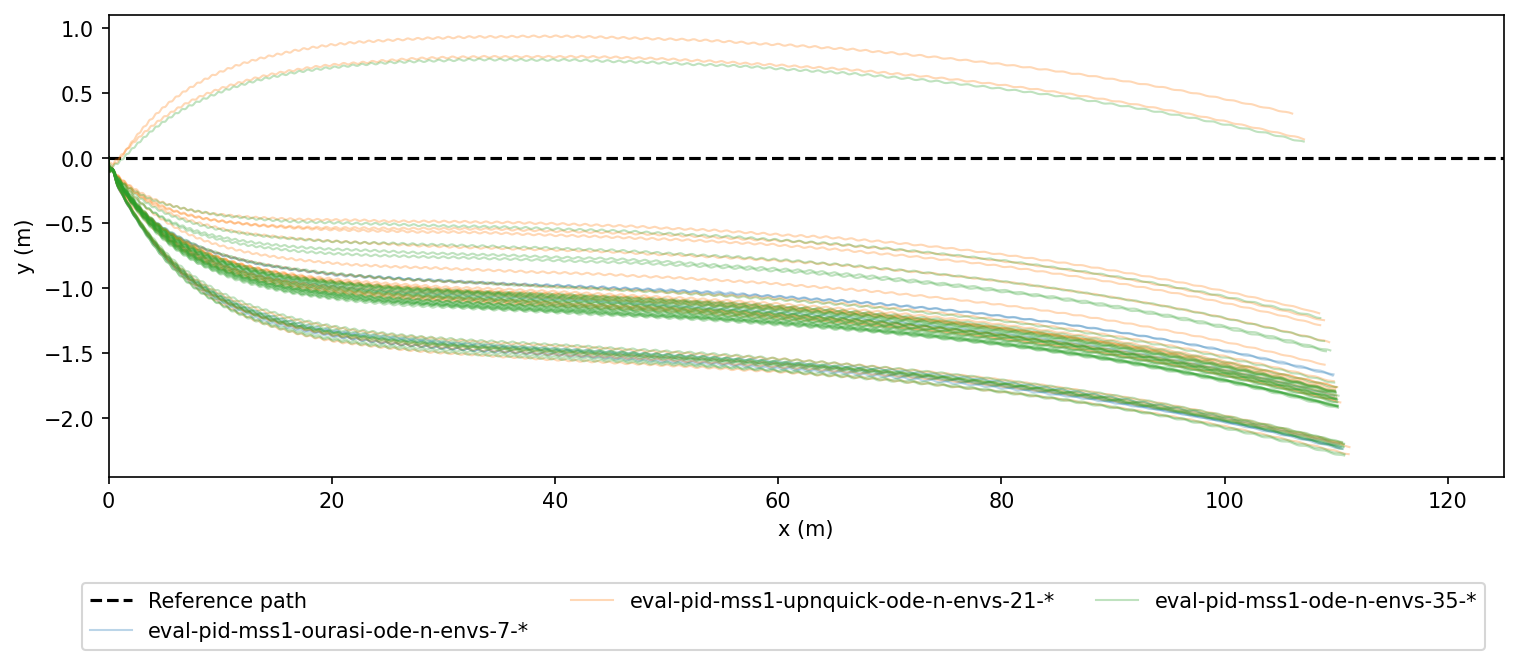

In [7]:
draw_trajectories(selected_names)

## Time

Drawing #steps/sec of eval-pid-mss1-ourasi-ode-n-envs-7-*
Drawing #steps/sec of eval-pid-mss1-upnquick-ode-n-envs-21-*


Drawing #steps/sec of eval-pid-mss1-ode-n-envs-35-*


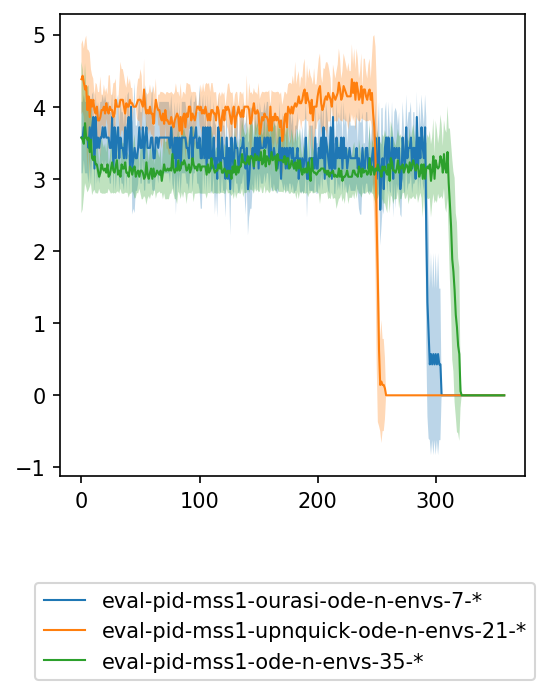

In [8]:
plot_nb_steps_per_seconds(selected_names)

In [9]:
print_duration(selected_names)

Getting duration of eval-pid-mss1-ourasi-ode-n-envs-7-*
Getting duration of eval-pid-mss1-upnquick-ode-n-envs-21-*
Getting duration of eval-pid-mss1-ode-n-envs-35-*
+----------------------------------------+----------------------+-----------------------+
|                                        | Episode Duration (s) | Duration per step (s) |
+----------------------------------------+----------------------+-----------------------+
|  eval-pid-mss1-ourasi-ode-n-envs-7-*   |    305.00 ± 3.41     |         0.0436        |
| eval-pid-mss1-upnquick-ode-n-envs-21-* |    262.24 ± 2.10     |         0.0125        |
|     eval-pid-mss1-ode-n-envs-35-*      |    336.28 ± 3.02     |         0.0096        |
+----------------------------------------+----------------------+-----------------------+


## Derivatives

Drawing derivatives of eval-pid-mss1-ourasi-ode-n-envs-7-*
Drawing derivatives of eval-pid-mss1-upnquick-ode-n-envs-21-*
Drawing derivatives of eval-pid-mss1-ode-n-envs-35-*


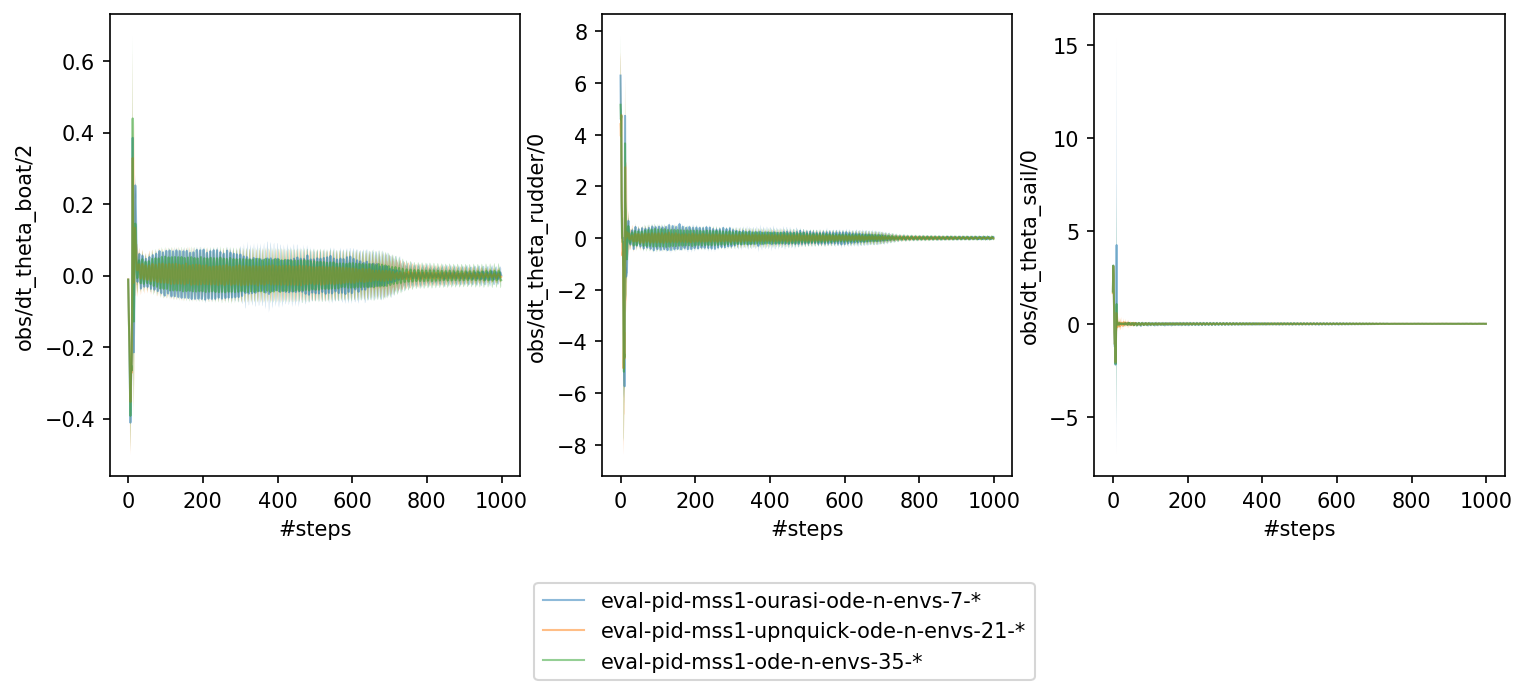

In [10]:
print_derivatives(selected_names)

# Selected engine: ODE (macbook)

In [9]:
selected_names = [
    'eval-pid-mss1-macbook-ode-n-envs-1',
    'eval-pid-mss1-macbook-ode-n-envs-7-*',
]

## Trajectories

Drawing trajectories of eval-pid-mss1-macbook-ode-n-envs-1
Drawing trajectories of eval-pid-mss1-macbook-ode-n-envs-7-*


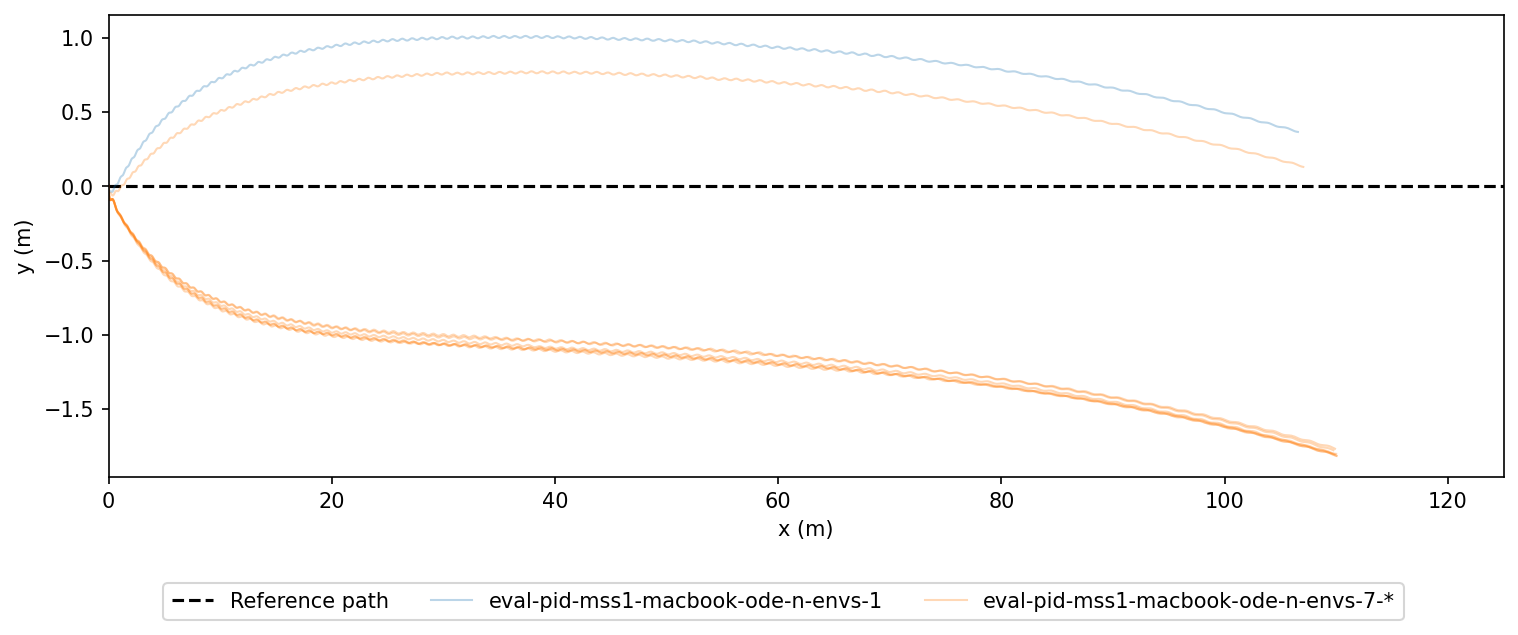

In [10]:
draw_trajectories(selected_names)

## Time

Drawing #steps/sec of eval-pid-mss1-macbook-ode-n-envs-1
Drawing #steps/sec of eval-pid-mss1-macbook-ode-n-envs-7-*


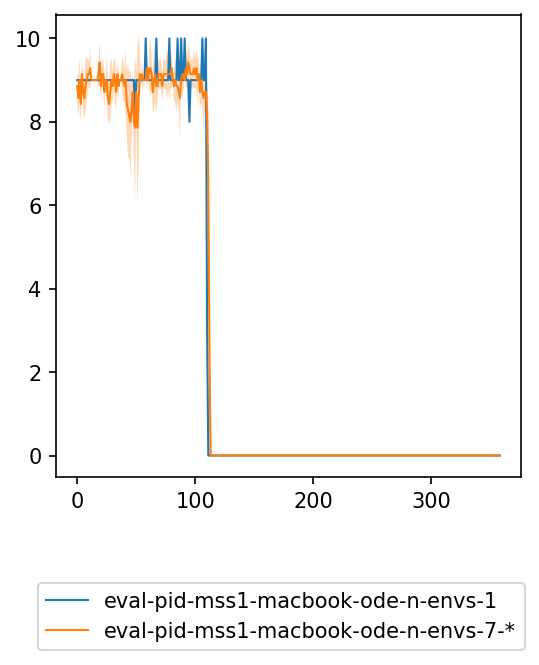

In [13]:
plot_nb_steps_per_seconds(selected_names)

In [15]:
print_duration(selected_names)

Getting duration of eval-pid-mss1-macbook-ode-n-envs-1
Getting duration of eval-pid-mss1-macbook-ode-n-envs-7-*
+--------------------------------------+----------------------+-----------------------+
|                                      | Episode Duration (s) | Duration per step (s) |
+--------------------------------------+----------------------+-----------------------+
|  eval-pid-mss1-macbook-ode-n-envs-1  |    115.08 ± 0.00     |         0.1151        |
| eval-pid-mss1-macbook-ode-n-envs-7-* |    119.88 ± 0.63     |         0.0171        |
+--------------------------------------+----------------------+-----------------------+


## Derivatives

Drawing derivatives of eval-pid-mss1-macbook-ode-n-envs-1
Drawing derivatives of eval-pid-mss1-macbook-ode-n-envs-7-*


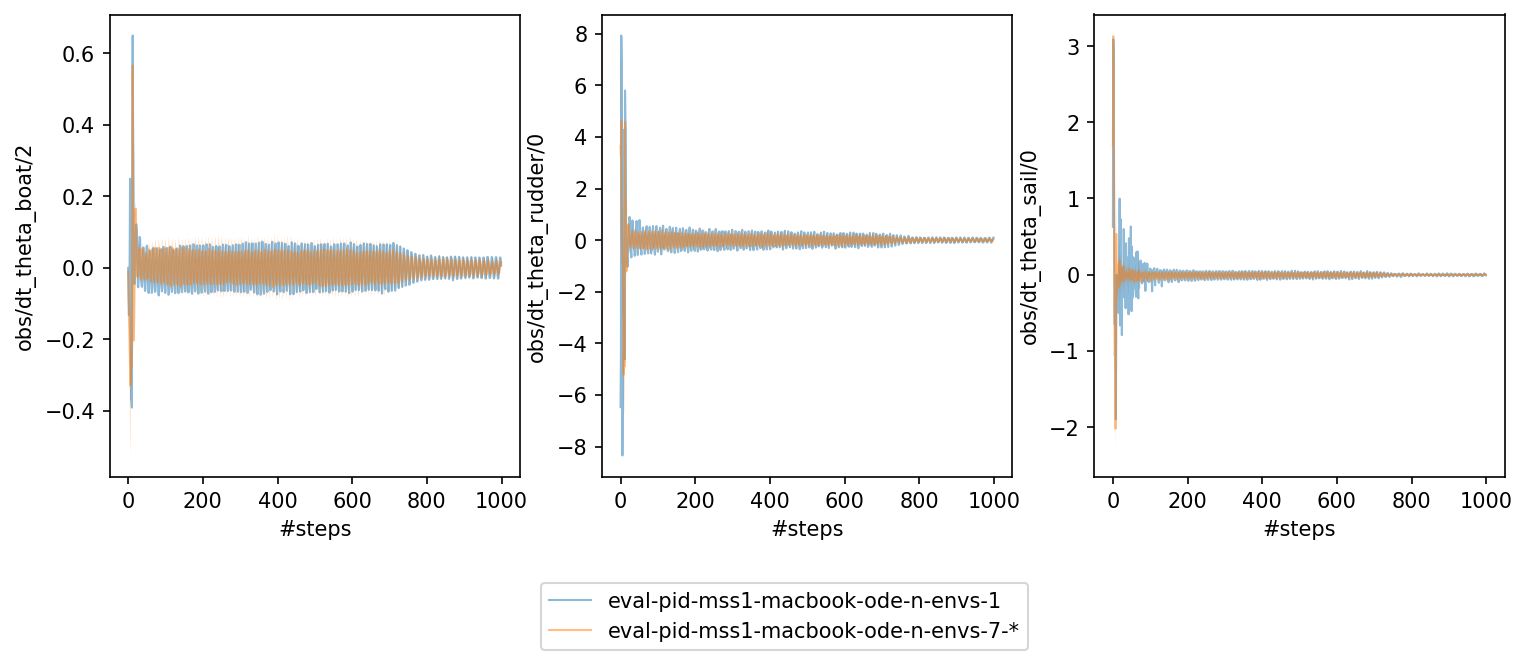

In [17]:
print_derivatives(selected_names)